# Section 1: Business Understanding

The data used in this project is Seattle Airbnb Data from 2016 to 2018. Dataset is sourced from Kaggle Database. There are 3 csv files included in this analysis: listing, review, and calendar. Listing includes information such as 

## Question 1: Property characteristics of each Seattle neighborhood

## Question 2: Which months of the year are busiest times of the year to visit Seattle?

## Question 3: How much does the increase of demand influence the price?

## Question 4: Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle overtime?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

ls=pd.read_csv('data/listings.csv')
review = pd.read_csv('data/reviews.csv')
calendar = pd.read_csv('data/calendar.csv')

# Data Undestanding

In [2]:
print(f'listings has \n{ls.isnull().sum()} missing values')

listings has 
id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64 missing values


In [3]:
missing_value_columns = (ls.isnull().sum()==0)
len(missing_value_columns)

92

In [4]:
# columns to keep 
cols_to_keep = ['id', 'name','host_id', 'host_name', 'host_since', \
                   'host_location','host_response_rate', 'host_acceptance_rate', 'host_is_superhost',\
                   'host_neighbourhood','host_listings_count', 'host_total_listings_count','neighbourhood', \
                   'neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode','is_location_exact', \
                   'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type',\
                   'amenities','price', 'weekly_price', 'monthly_price', 'security_deposit',\
                   'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights', \
                   'calendar_updated','has_availability','availability_30', 'availability_60', \
                   'availability_90','availability_365','number_of_reviews','first_review', 'last_review', \
                   'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',\
                   'review_scores_checkin', 'review_scores_communication','review_scores_location', \
                   'review_scores_value','requires_license','cancellation_policy','require_guest_profile_picture',\
                   'require_guest_phone_verification', 'calculated_host_listings_count','reviews_per_month']

In [5]:
cols=cols_to_keep.copy()
new_ls=ls[cols]

In [6]:
# calculate percentage of missing values in columns selected to be kept
(new_ls.isnull().sum()/ls.shape[0]*100).sort_values(ascending=False)

monthly_price                       60.267156
security_deposit                    51.126244
weekly_price                        47.380828
cleaning_fee                        26.977475
host_acceptance_rate                20.246202
review_scores_checkin               17.234154
review_scores_accuracy              17.234154
review_scores_value                 17.181771
review_scores_location              17.155579
review_scores_cleanliness           17.103195
review_scores_communication         17.050812
review_scores_rating                16.946045
last_review                         16.422211
first_review                        16.422211
reviews_per_month                   16.422211
host_response_rate                  13.698271
neighbourhood                       10.895757
host_neighbourhood                   7.857517
bathrooms                            0.419068
host_location                        0.209534
zipcode                              0.183342
bedrooms                          

In [7]:
# Comparison of three neighbourhood fields
# Will use neighbourhood_group_cleansed as the grouping paramter
new_ls.loc[ls['neighbourhood'].isnull()==True, ['neighbourhood','neighbourhood_cleansed',\
                                                'neighbourhood_group_cleansed']]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
12,NaN,West Queen Anne,Queen Anne
15,NaN,West Queen Anne,Queen Anne
20,NaN,West Queen Anne,Queen Anne
51,NaN,West Queen Anne,Queen Anne
65,NaN,Adams,Ballard
...,...,...,...
3779,NaN,Fremont,Other neighborhoods
3795,NaN,Fremont,Other neighborhoods
3802,NaN,Fremont,Other neighborhoods
3815,NaN,Rainier Beach,Rainier Valley


In [8]:
df_mean=new_ls.drop(columns=['id','host_id']).groupby('neighbourhood_group_cleansed').mean().reset_index()
ls['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

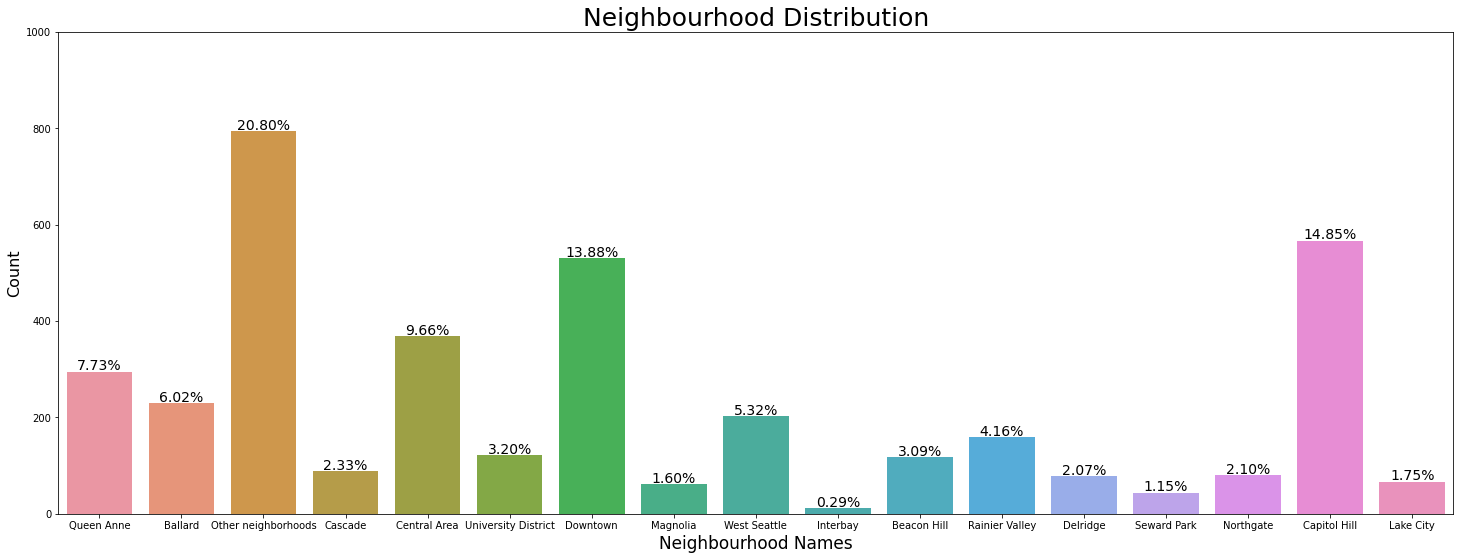

In [9]:
total = len(ls)

plt.figure(figsize=(25,24))
#plt.suptitle('Distributions', fontsize=22)

plt.subplot(211)
g = sns.countplot(x='neighbourhood_group_cleansed', data=ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Neighbourhood Distribution", fontsize=25)
g.set_ylim(0,1000)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Count", fontsize=16)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

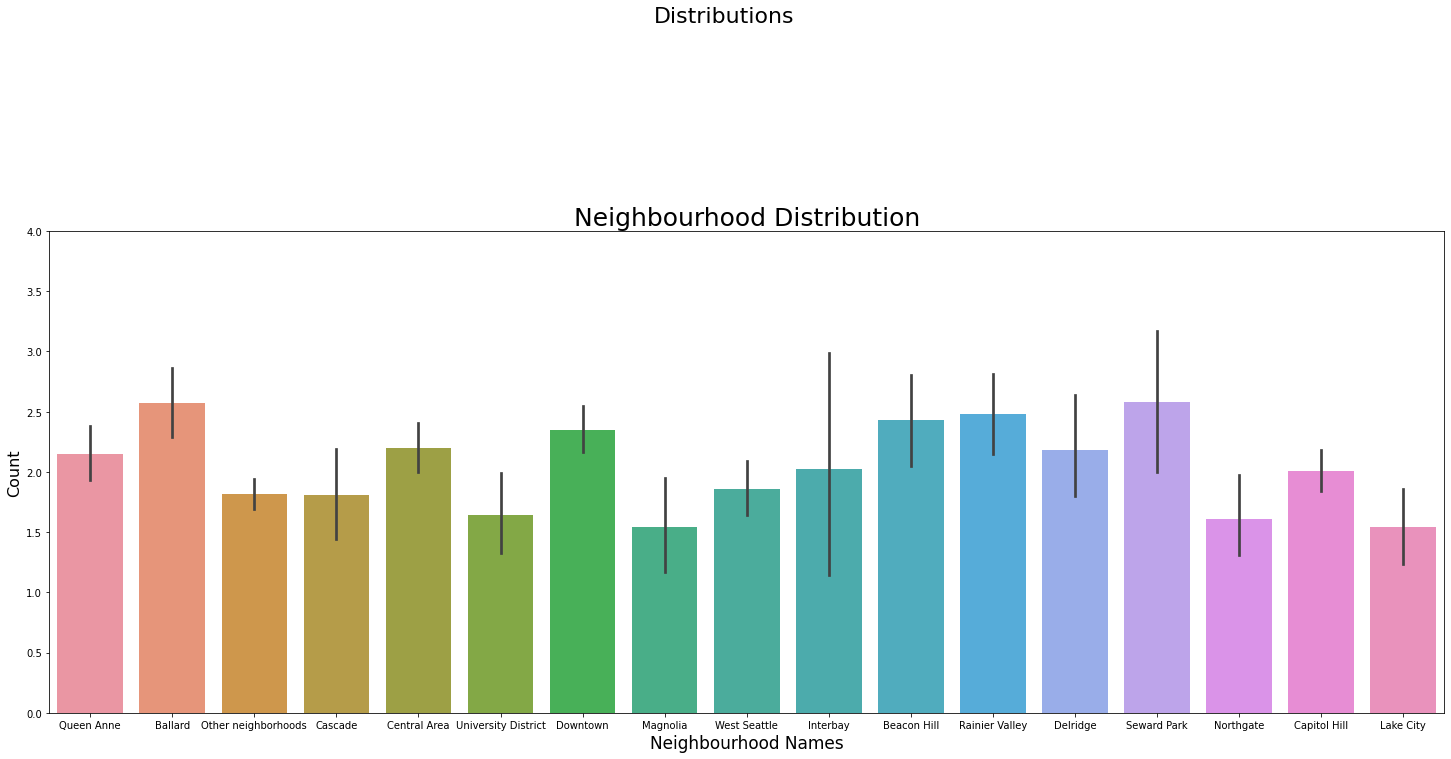

In [10]:
total = len(ls)

plt.figure(figsize=(25,24))
plt.suptitle('Distributions', fontsize=22)

plt.subplot(211)
g = sns.barplot(x='neighbourhood_group_cleansed', 
                y='reviews_per_month',data=ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Neighbourhood Distribution", fontsize=25)
g.set_ylim(0,4)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Count", fontsize=16)
# for p in g.patches:
#     height = p.get_height()
#     g.text(p.get_x()+p.get_width()/2.,
#             height + 3,
#             '{:1.2f}%'.format(height/total*100),
#             ha="center", fontsize=14) 

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

In [11]:
ls['host_response_rate']=ls['host_response_rate'].str.replace('%','').astype('float')
#ls['host_response_rate'] = ls['host_response_rate']

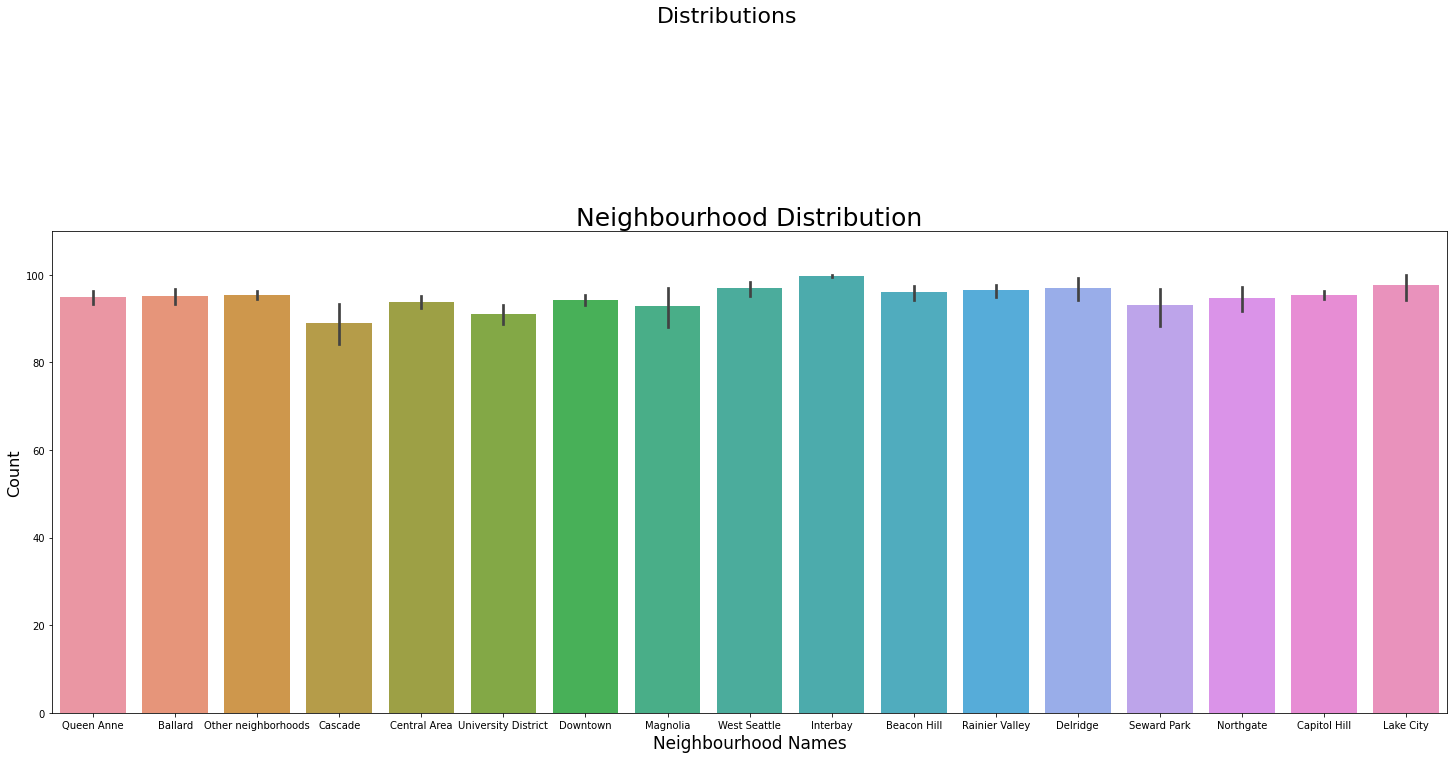

In [12]:
import numpy as np
ls.groupby('neighbourhood_group_cleansed').agg({'host_response_rate':'mean'})

total = len(ls)

plt.figure(figsize=(25,24))
plt.suptitle('Distributions', fontsize=22)

plt.subplot(211)
g = sns.barplot(x='neighbourhood_group_cleansed', 
                y='host_response_rate',data=ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Neighbourhood Distribution", fontsize=25)
g.set_ylim(0,110)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Count", fontsize=16) 

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

# Exploratory Data Analysis

## host_listings_count Distribution by Neighborhood

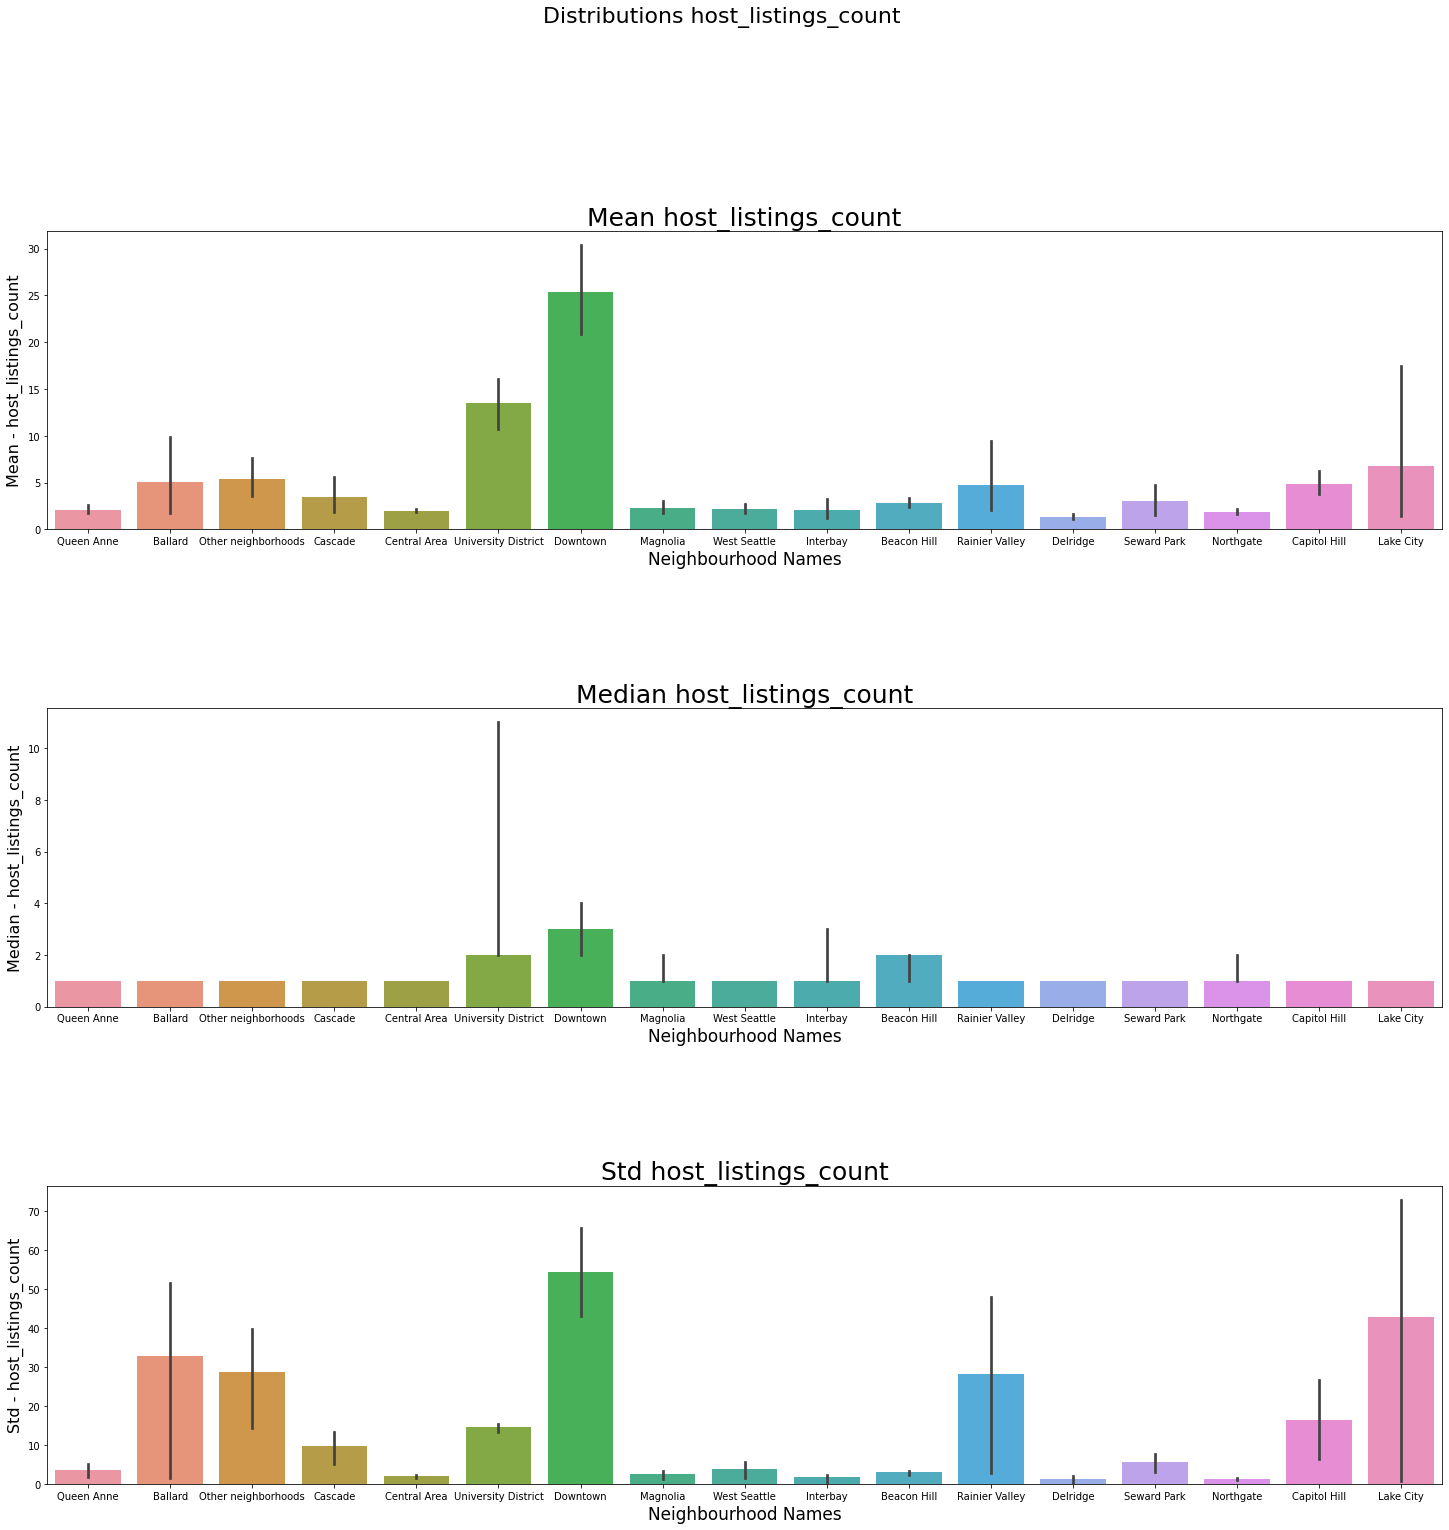

In [13]:
col = 'host_listings_count'

plt.figure(figsize=(25,24))
plt.suptitle('Distributions '+col, fontsize=22)

plt.subplot(311)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.mean, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Mean "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Mean - "+col, fontsize=16)

plt.subplot(312)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.median, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Median "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Median - "+col, fontsize=16)

plt.subplot(313)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.std, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Std "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Std - "+col, fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

## host_total_listings_count Distribution by Neighborhood

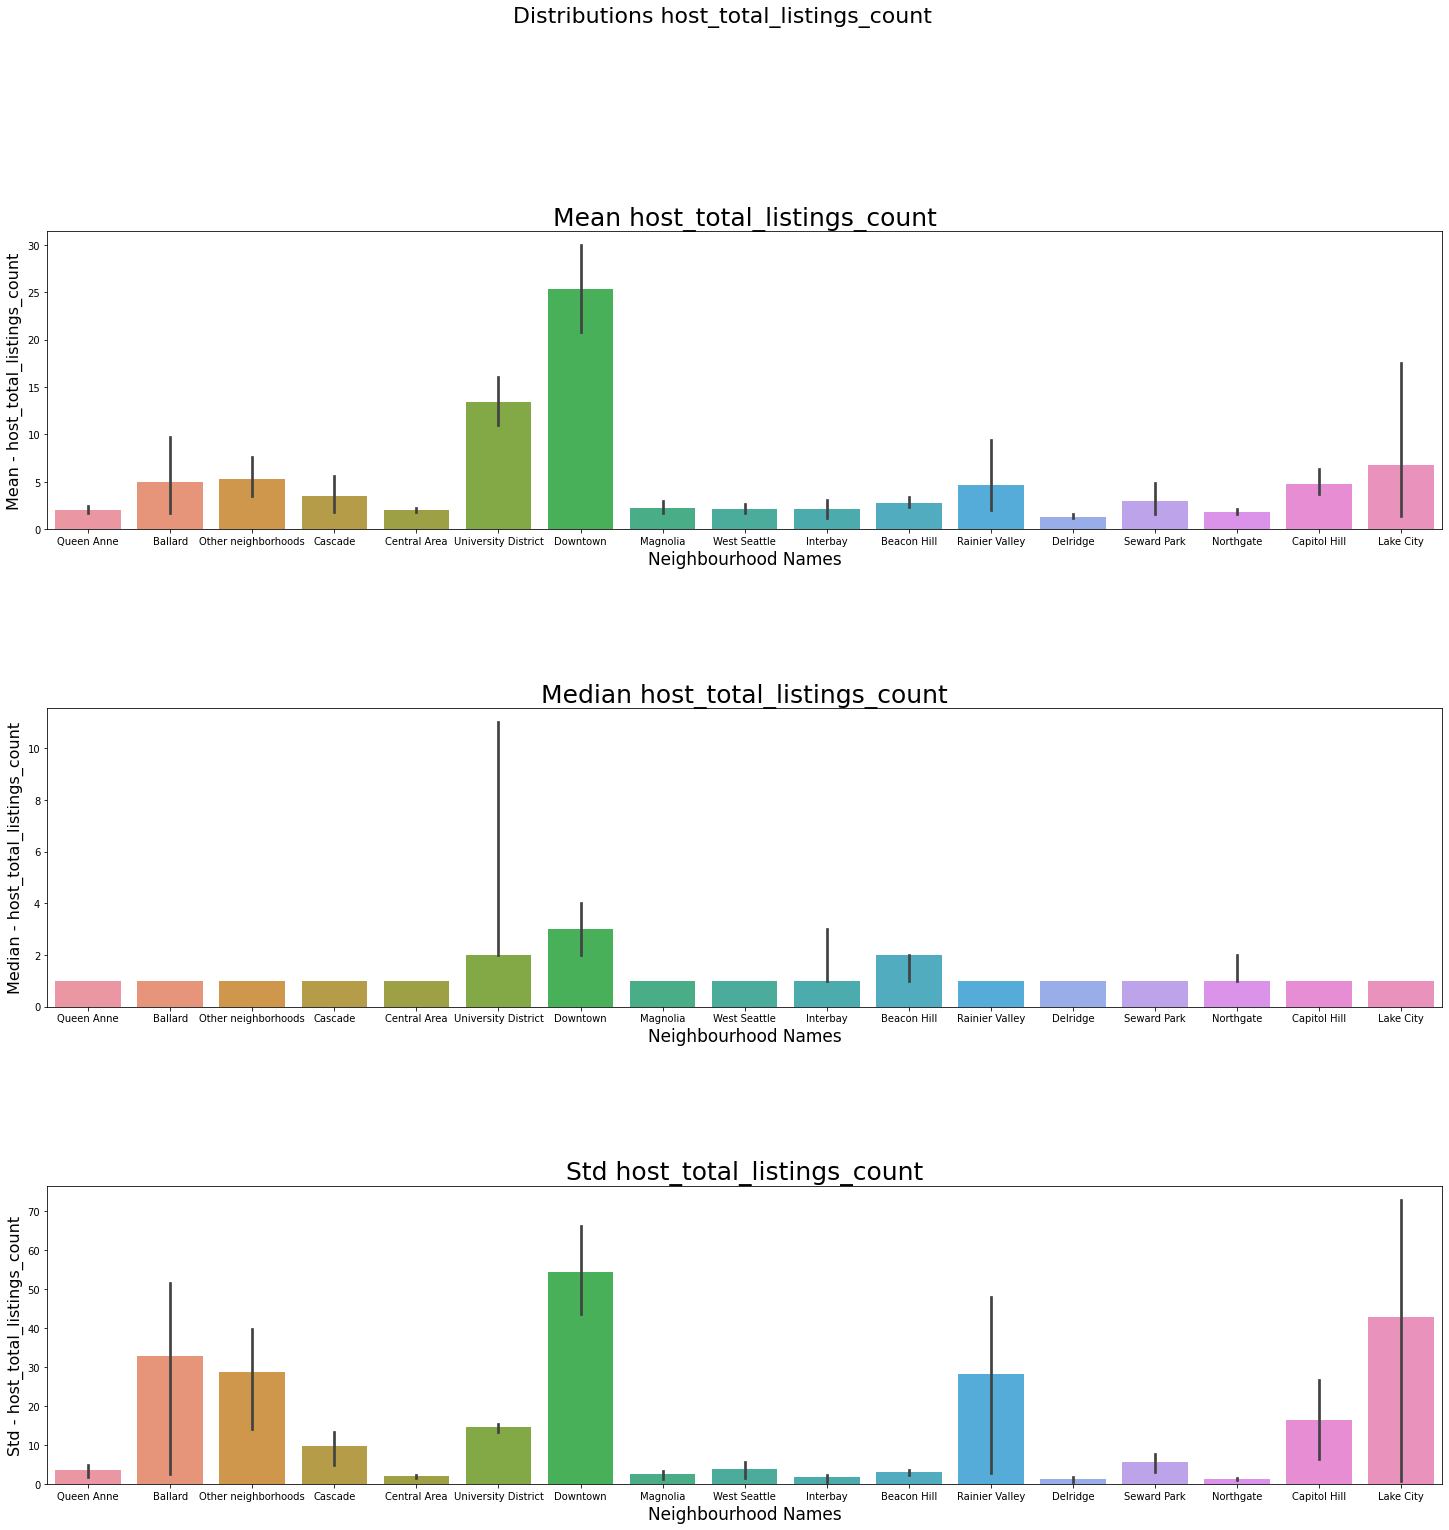

In [14]:
col = 'host_total_listings_count'

plt.figure(figsize=(25,24))
plt.suptitle('Distributions '+col, fontsize=22)

plt.subplot(311)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.mean, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Mean "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Mean - "+col, fontsize=16)

plt.subplot(312)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.median, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Median "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Median - "+col, fontsize=16)

plt.subplot(313)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.std, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Std "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Std - "+col, fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

## accommodates Distribution by neighborhood

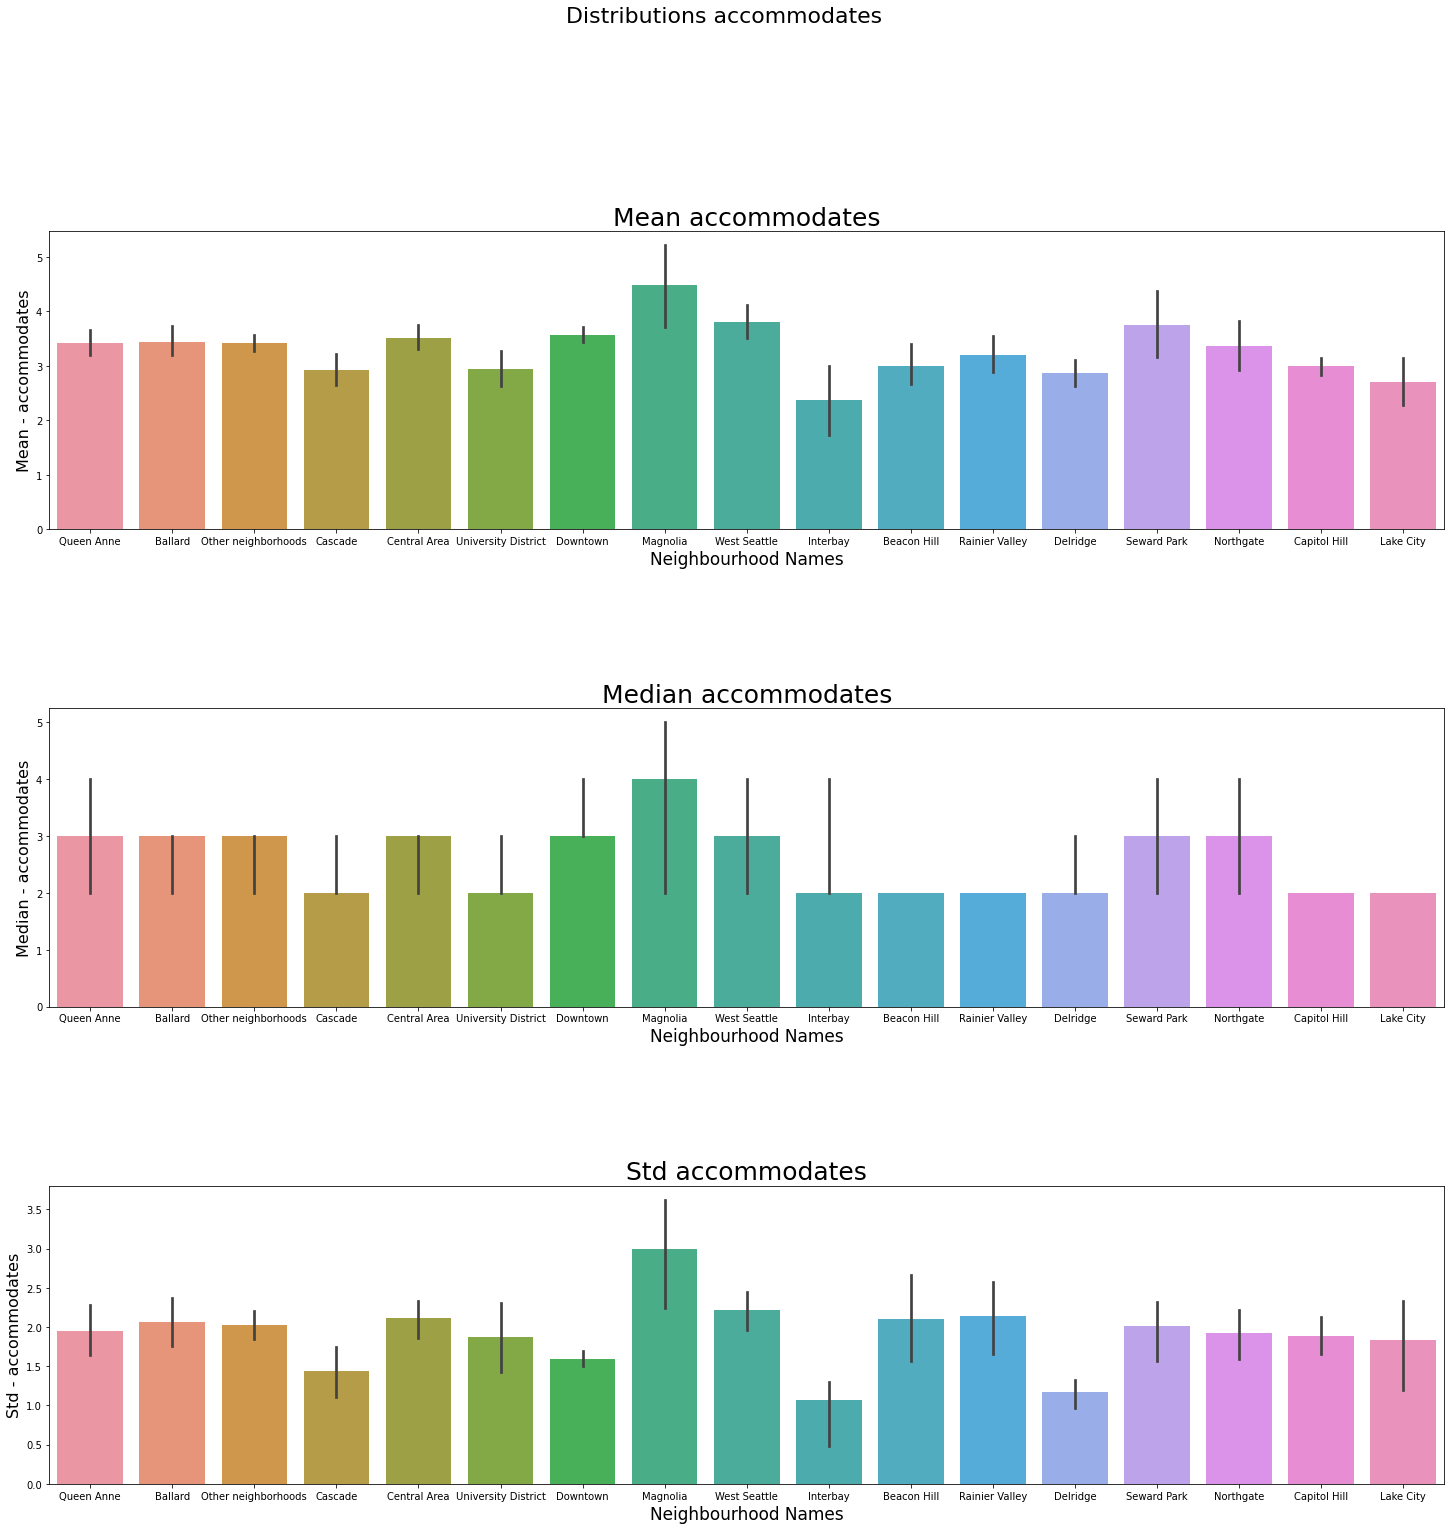

In [15]:
col = 'accommodates'

plt.figure(figsize=(25,24))
plt.suptitle('Distributions '+col, fontsize=22)

plt.subplot(311)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.mean, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Mean "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Mean - "+col, fontsize=16)

plt.subplot(312)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.median, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Median "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Median - "+col, fontsize=16)

plt.subplot(313)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.std, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Std "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Std - "+col, fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

## bathrooms Distribution by neighborhood

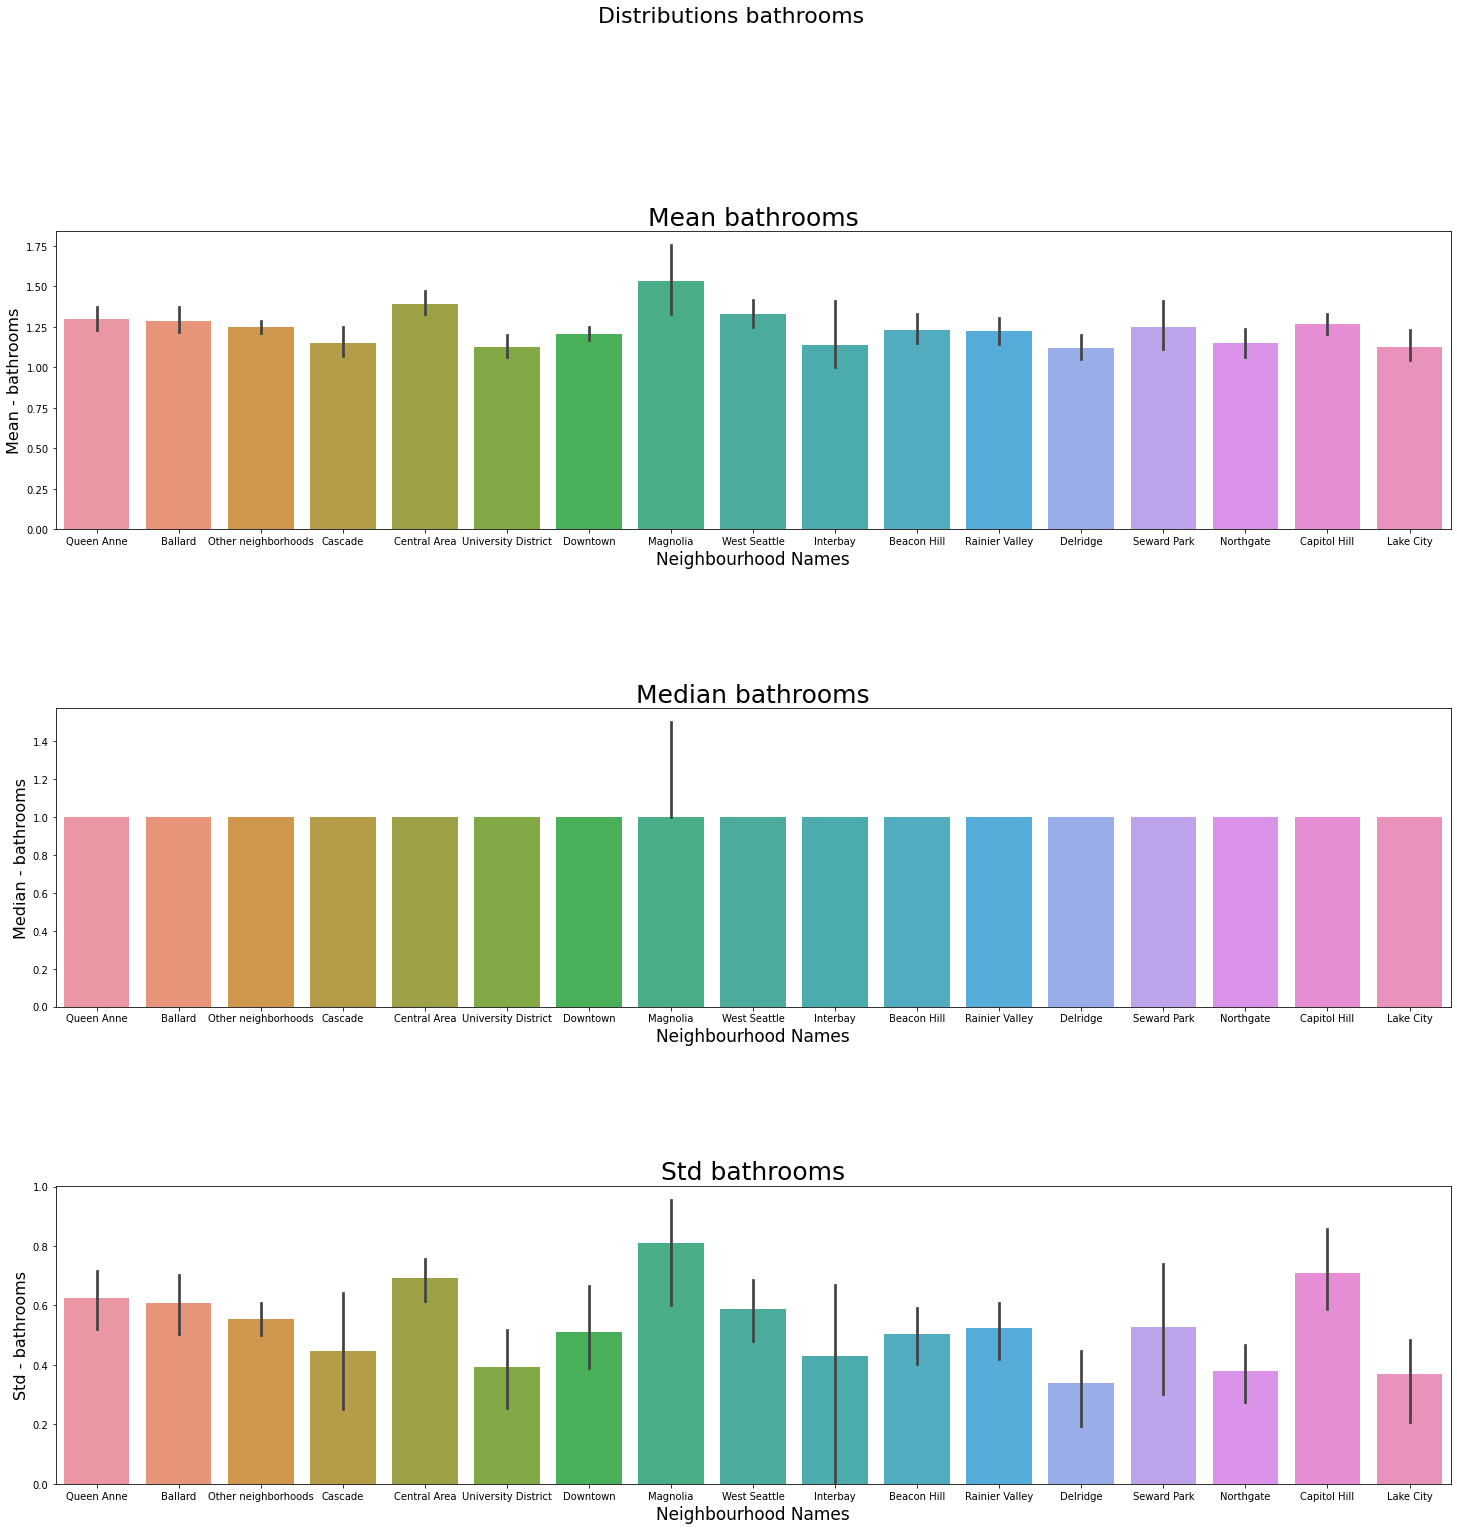

In [16]:
col = 'bathrooms'

plt.figure(figsize=(25,24))
plt.suptitle('Distributions '+col, fontsize=22)

plt.subplot(311)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.mean, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Mean "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Mean - "+col, fontsize=16)

plt.subplot(312)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.median, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Median "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Median - "+col, fontsize=16)

plt.subplot(313)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.std, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Std "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Std - "+col, fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

## bedrooms Distribution by neighborhood

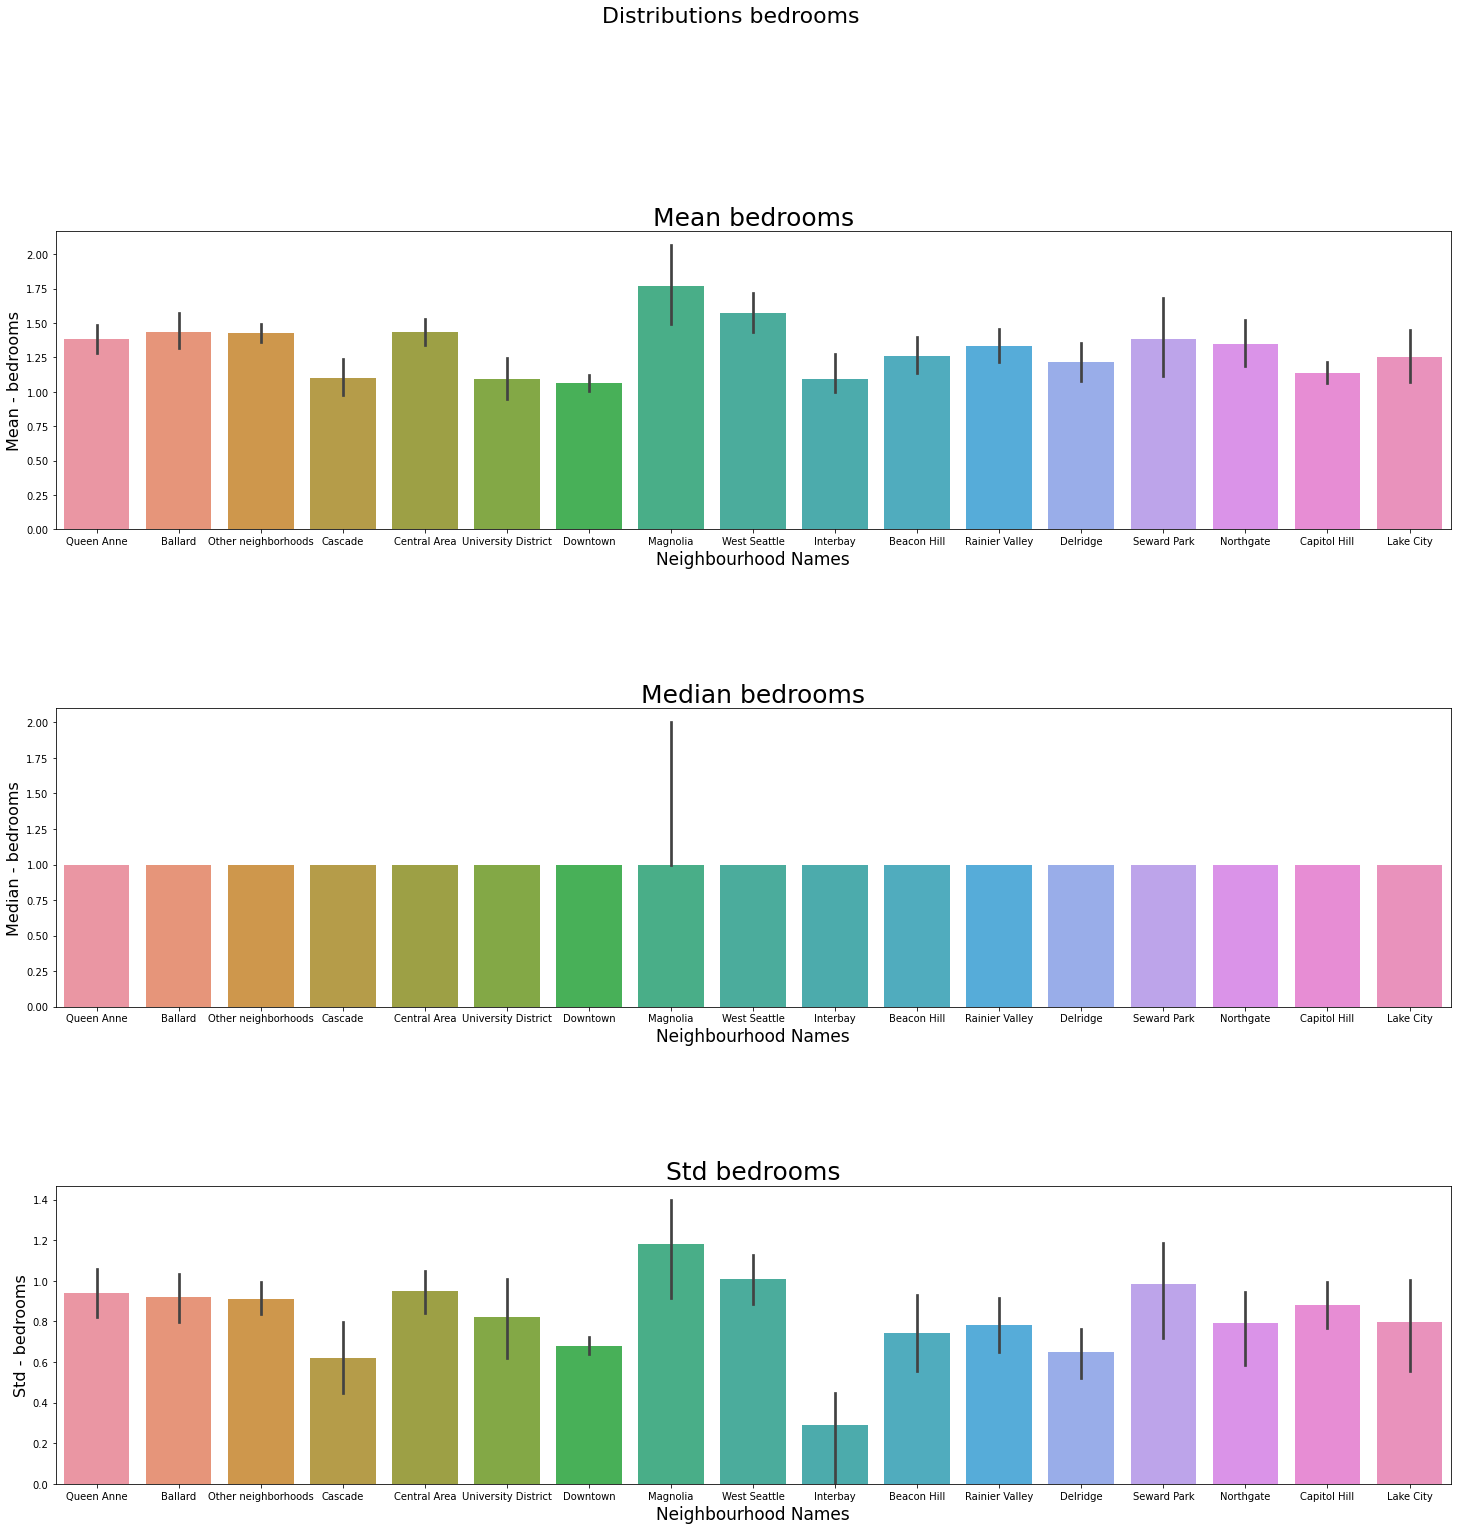

In [17]:
col = 'bedrooms'

plt.figure(figsize=(25,24))
plt.suptitle('Distributions '+col, fontsize=22)

plt.subplot(311)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.mean, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Mean "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Mean - "+col, fontsize=16)

plt.subplot(312)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.median, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Median "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Median - "+col, fontsize=16)

plt.subplot(313)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.std, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Std "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Std - "+col, fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

## beds Distribution by neighborhood

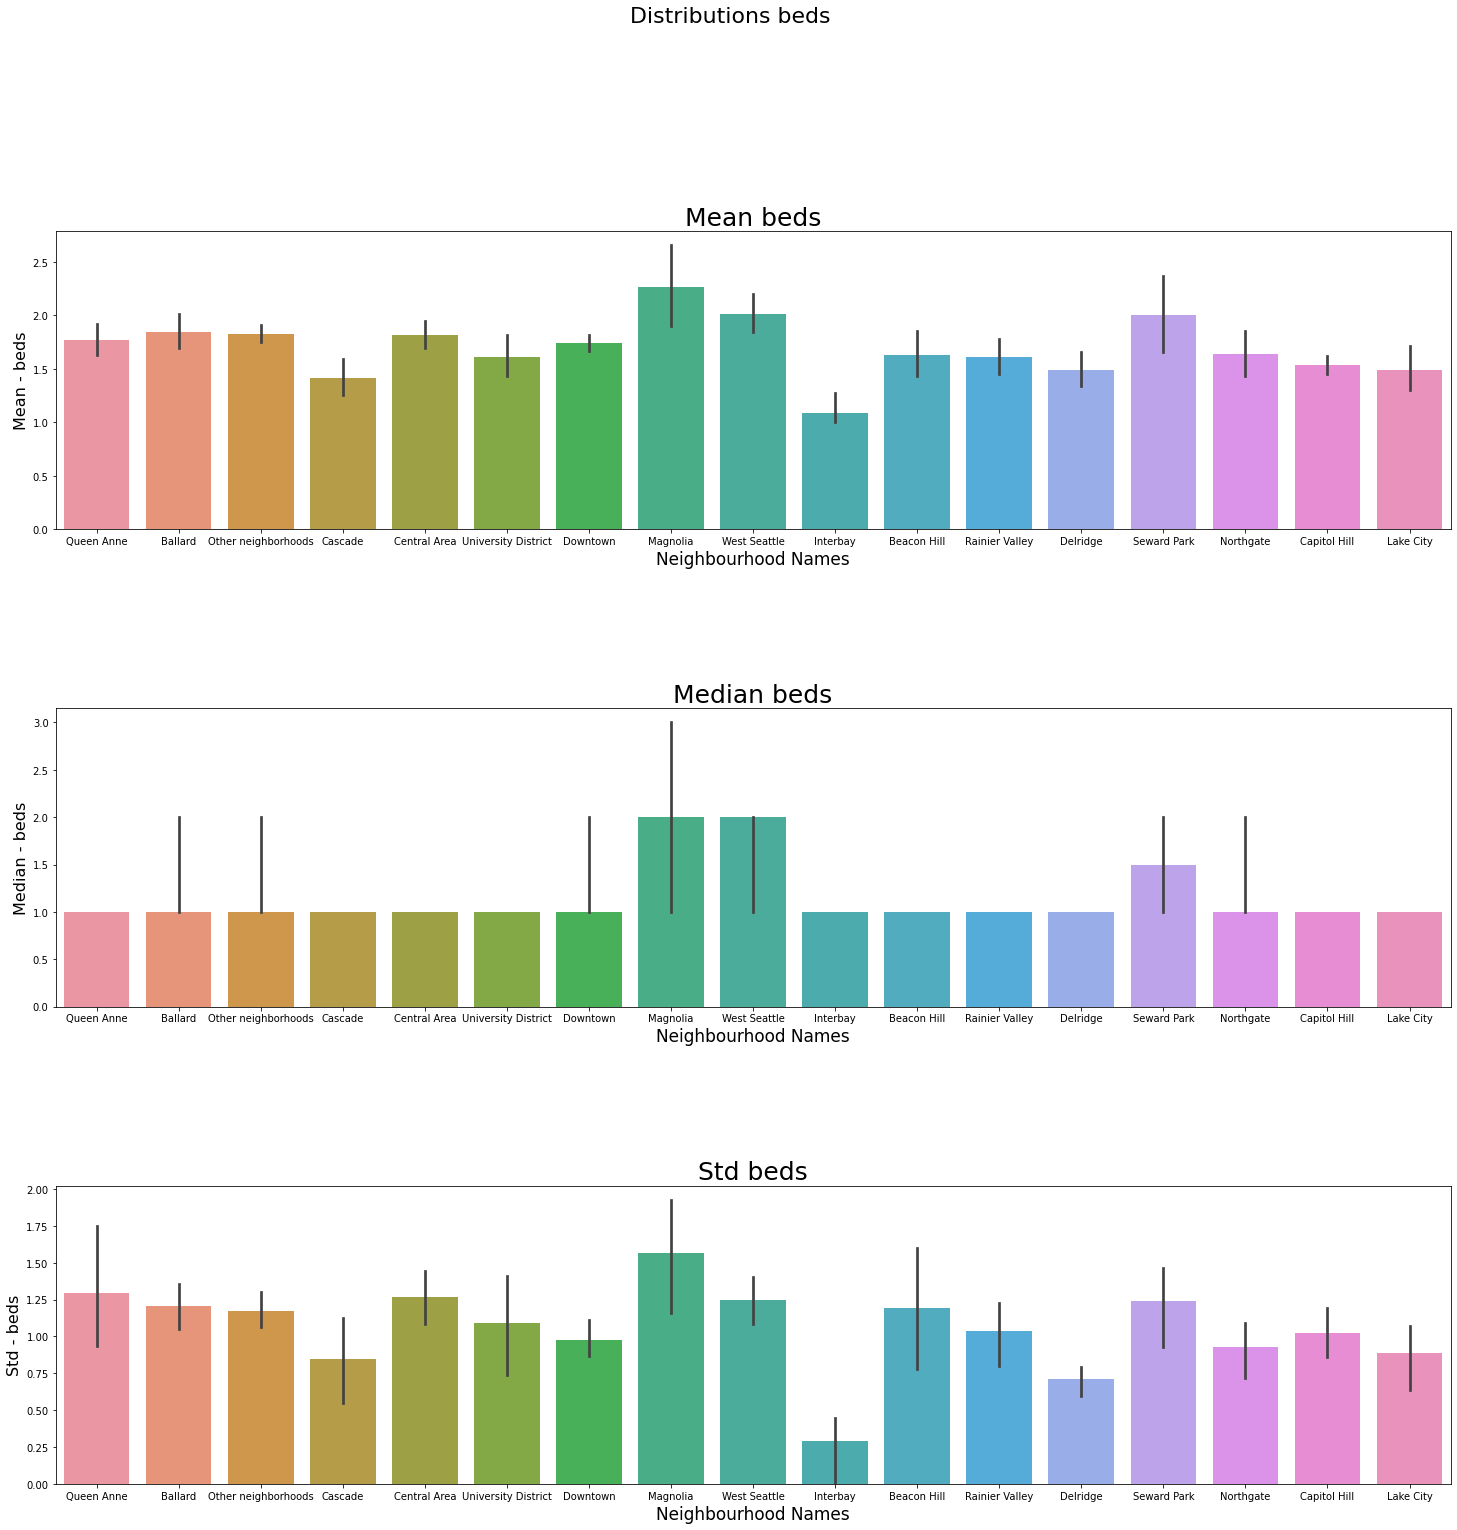

In [18]:
col = 'beds'

plt.figure(figsize=(25,24))
plt.suptitle('Distributions '+col, fontsize=22)

plt.subplot(311)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.mean, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Mean "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Mean - "+col, fontsize=16)

plt.subplot(312)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.median, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Median "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Median - "+col, fontsize=16)

plt.subplot(313)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.std, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Std "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Std - "+col, fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

## guests_included Distribution by neighborhood

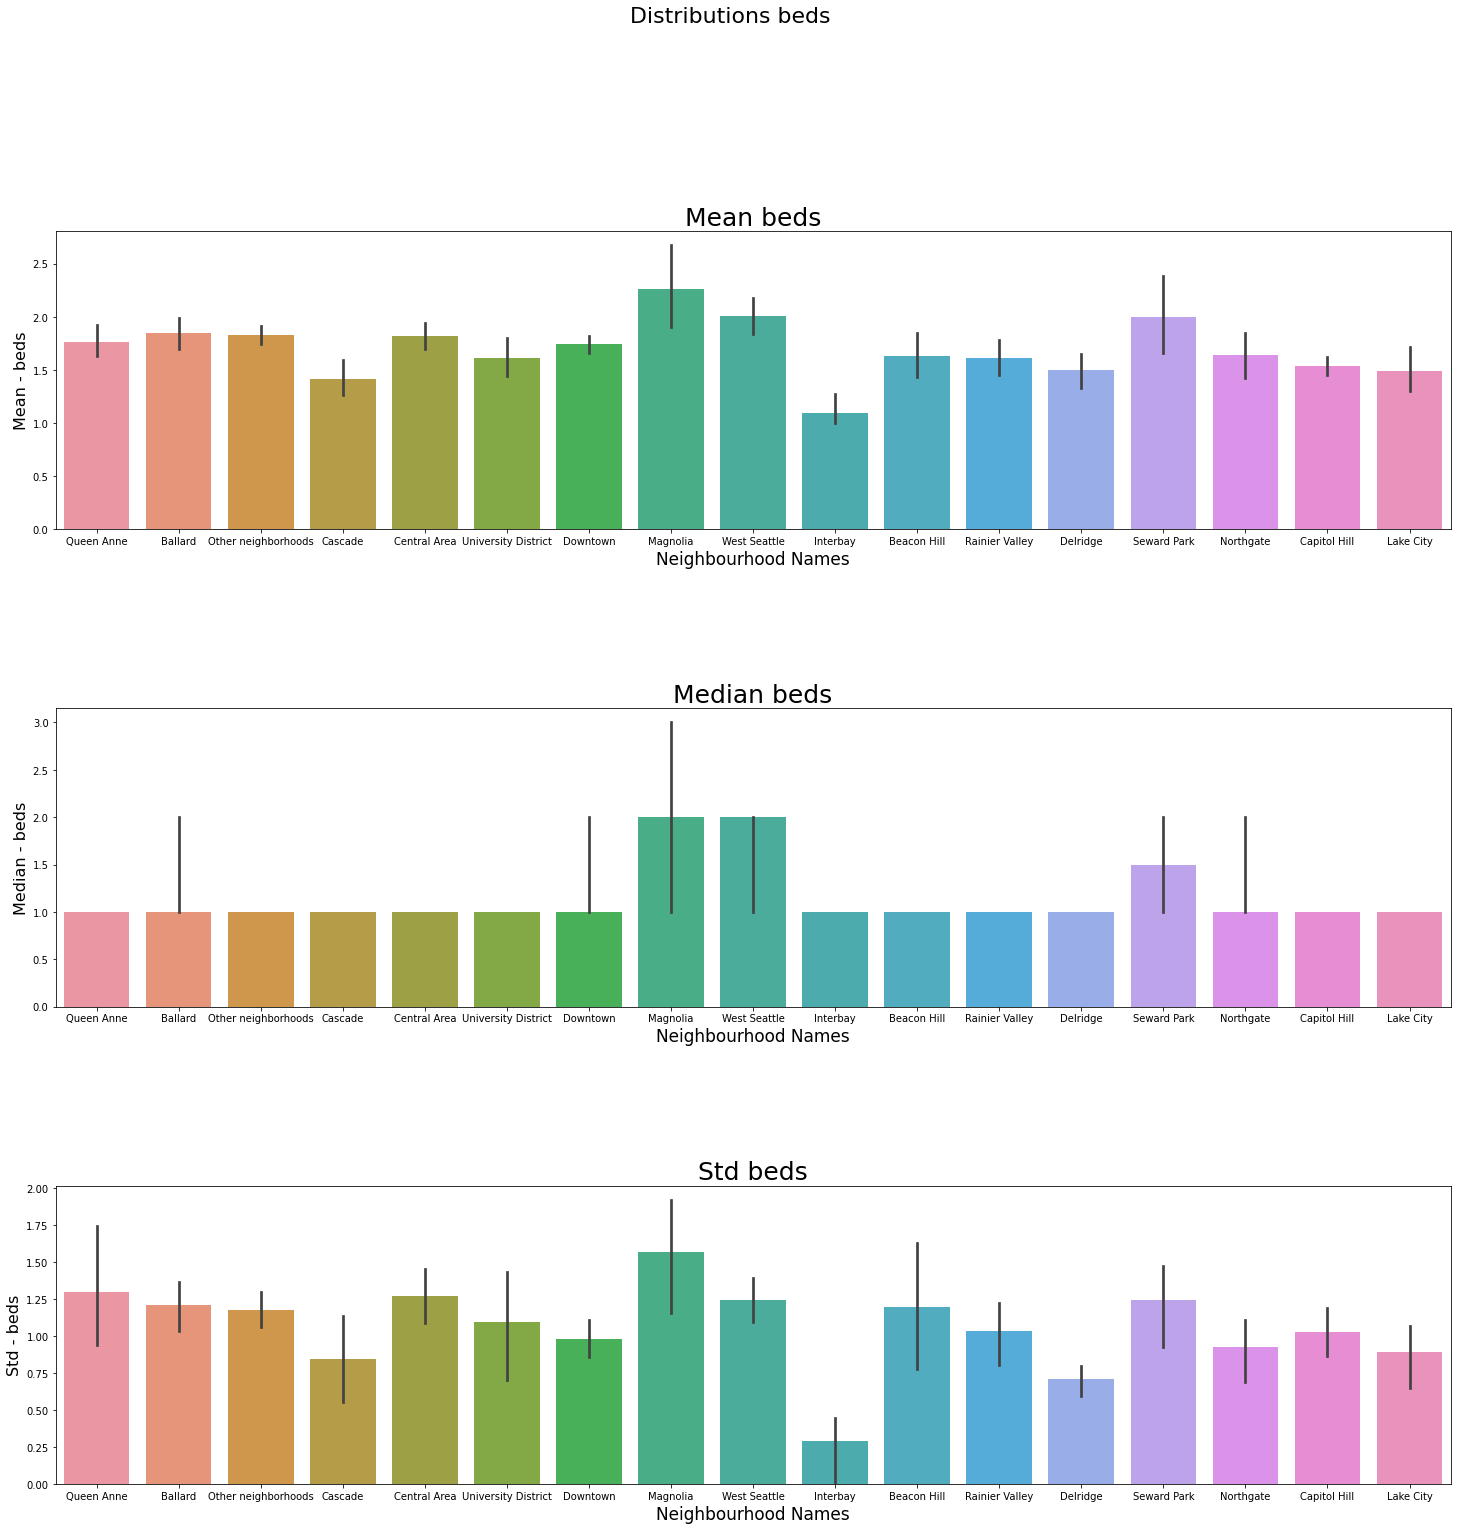

In [19]:
col = 'beds'

plt.figure(figsize=(25,24))
plt.suptitle('Distributions '+col, fontsize=22)

plt.subplot(311)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.mean, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Mean "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Mean - "+col, fontsize=16)

plt.subplot(312)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.median, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Median "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Median - "+col, fontsize=16)

plt.subplot(313)
g = sns.barplot(x='neighbourhood_group_cleansed',
                y=col,
                estimator = np.std, 
                data=new_ls)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Std "+col, fontsize=25)
g.set_xlabel("Neighbourhood Names", fontsize=17)
g.set_ylabel("Std - "+col, fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

## visiting frequency by month

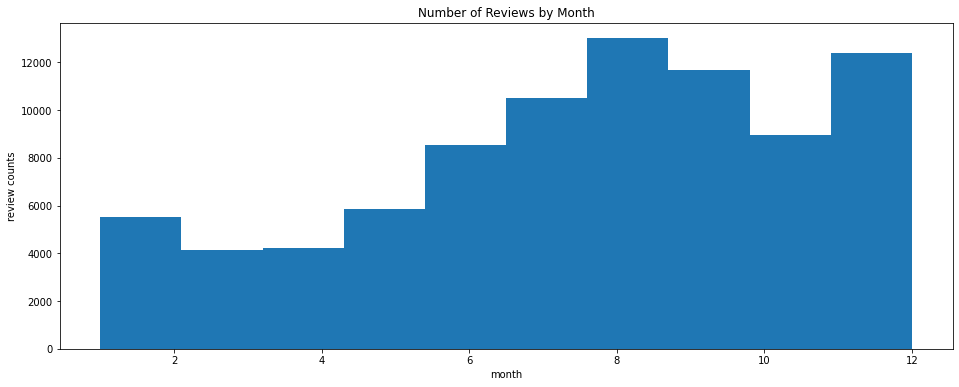

In [20]:
plt.figure(figsize=(16,6))
review['month']=review['date'].astype('datetime64').dt.month
plt.hist(review['month'])
plt.xlabel('month')
plt.ylabel('review counts')
plt.title('Number of Reviews by Month')
plt.show()

<ipython-input-21-99a5245d576c>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  temp3['price'] = temp3['price'].str.replace('$','')


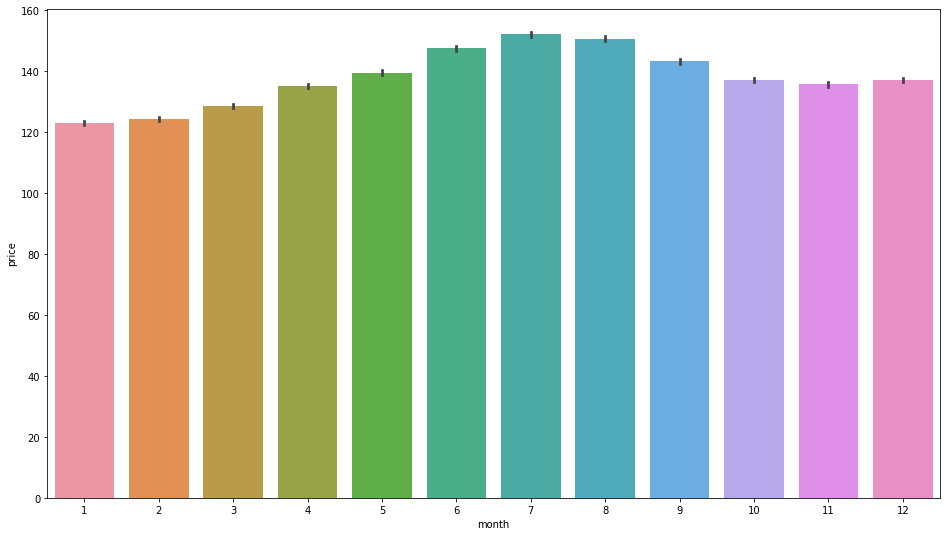

In [21]:
plt.figure(figsize=(16,9))
calendar['month']=calendar['date'].astype('datetime64').dt.month
temp3 = calendar[['month','price']].dropna()
temp3['price'] = temp3['price'].str.replace('$','')
temp3['price'] = temp3['price'].str.replace(',','')
temp3['price'] = temp3['price'].astype('float')
sns.barplot(data = temp3, x='month', y ='price')
plt.show()

## Correlation Analysis between listing and visiting

<AxesSubplot:xlabel='listing_since'>

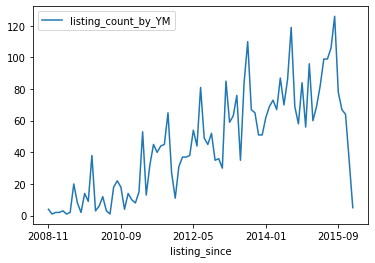

In [22]:
ls['listing_since'] = ls['host_since'].astype('datetime64').dt.strftime('%Y-%m')
temp1 = ls.groupby('listing_since').agg({'id':'count'}).rename(columns={'id':'listing_count_by_YM'})
temp1.plot()

<AxesSubplot:xlabel='visiting_date'>

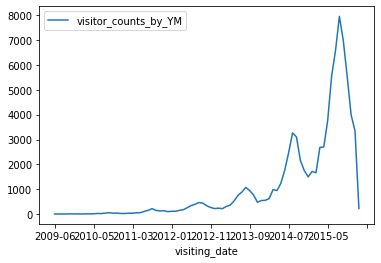

In [23]:
review['visiting_date'] = review['date'].astype('datetime64').dt.strftime('%Y-%m')
temp2 = review.groupby('visiting_date').agg({'id':'count'}).rename(columns={'id':'visitor_counts_by_YM'})
temp2.plot()

# Section 4: Evaluate the Results

### Q1: Property characteristics of each Seattle neighborhood
#### answer
Capitol Hill has the most listing properties with Downtown in the second place and Central Area as the third. The downtown area has the highest mean host_listings_count, median host_listings_counts, and a more varied host_listings_count. Same pattern could be found in host_total_listings_count with the highest mean, median, standard deviation of host_total_listings_counts. 

Magnolia shows an advantage of hosting more residents, as compared to other neighbors, has more bathrooms, bedrooms, beds available, more guests that be included.

Thus, even though downtown offers more airbnb choices, it is recommended to choose an airbnb in Magnolia neighborhood because it is likely to have more spaces, thus leading to a more pleasing experience.

### Q2: Which months of the year are busiest times of the year to visit Seattle?
#### answer

The peak of average airbnb price is in July with August as the month with the second highest price.

### Q3: How much does the increase of demand influence the price?

#### answer
As compared to January to April, July and August exhibit much higher prices, approximately up by 10 to 15% on average.

### Q4: Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle overtime?

#### answer
Ther is an upward trend for airbnb listings over time, with some seasonality. Meanwhile, the visitor counts also increase as the reviews of airbnb bookings increase over these years.